# Predict Survival on Titanic Applying Machine Learning


# 1 Project Topic

The project is to predict  which passengers survived the Titanic shipwreck. It's a classification task, and the algorithms will be applied are Logistic Regression, Decision Tree and Gaussian Naive Bayes.<br>
The motivation is to learn from the disaster and we want to find out which machine learning algorithm shown above will predict survival the best.<br>
This report has been uploaded to my GitHub repository at this link: https://github.com/Dogwoodhh/Titanic.git.

# 2 Data

## 2.1 Citation

The data is from a Kaggle competition at this link: https://www.kaggle.com/competitions/titanic/data?select=train.csv.

@misc{titanic,<br>
    author = {Jessica Li, Will Cukierski},<br>
    title = {Titanic - Machine Learning from Disaster},<br>
    publisher = {Kaggle},<br>
    year = {2012},<br>
    url = {https://kaggle.com/competitions/titanic}<br>
}

## 2.2 Data Size

In [1]:
# Loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/leiyao/Desktop/train.csv")
print(df.shape)

(891, 12)


Number of rows/samples: 891<br>
Number of columns/features: 12<br>

## 2.3 Data Type and Description of Features

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId: numeric, passenger ID<br>
Survived: numeric, survival, 0 = No, 1 = Yes<br>
Pclass: numeric, ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd<br>
Name: categorical, name        <br>
Sex: categorical, sex         <br>
Age: numeric, age in years    <br>
SibSp: numeric, # of siblings / spouses aboard the Titanic  <br>
Parch: numeric, # of parents / children aboard the Titanic	      <br>
Ticket: categorical, Ticket number<br>
Fare: numeric, Passenger fare   <br>
Cabin: categorical, Cabin number <br>
Embarked: categorical, Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton<br> <br>


# 3 Data Cleaning

## 3.1 Irrelevant Features

Remove PassengerId, Name, Ticket and Cabin features, since they are irrelevant when predicting survival or not. 

In [4]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


## 3.2 Missing Values

Let's see if we have missing values.

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Age and Embarked have missing values. We can delete rows with NAs in Age and Embarked feature.

In [6]:
df = df.dropna(subset=['Age', 'Embarked'])
df.isnull().sum() # check for missing values again

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now the dataset has no missing values.

## 3.3 Imbalance

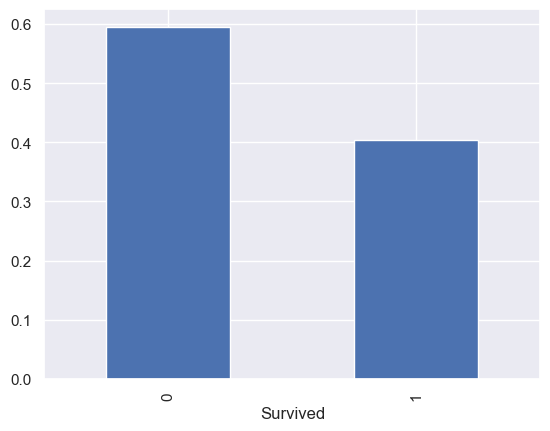

In [7]:
df.groupby(['Survived']).size().transform(lambda c: c/sum(c)).plot.bar()
plt.show()

The ratio of Unsurvived vs. Survived is 0.6: 0.4, so the data is balanced.

## 3.4 Conclusion of Data Cleaning

We removed irrelavent features, droped missing values in Age and Embarked features, and found that the data is balanced. Now we are prepared to do some explorations on different features.

# 4 Exploratory Data Analysis

We will use numerical summaries and visualizations to explore the data and to identify potential relationships between variables.
1. For each feature, countplots of Survived = 0 and Survived = 1 will be presented to show the relationship between each feature and Survived. 
2. Then we will use chi-squared test to see if there is any statistical denpendency between each feature and Survived.
3. Last, we will apply correlation matrix to check if there is high correlation between distinct features.


Since countplot and chi-squared test are available when two variables are both categorical, we will create new categorical features Age_groups and Fare_groups to represent continuous features (Age and Fare), and delete them in the end.

## 4.1 Pclass

### 4.1.1 Countplot

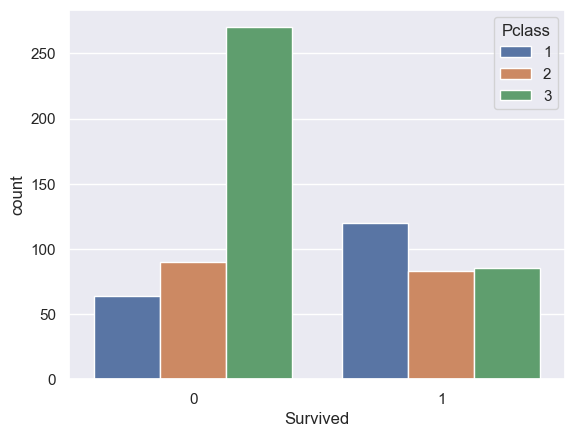

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.show()

It is obvious that passengers in Pclass 1 are more likely to survive and those in Pclass 3 are less likely to survive. Pclass and Survived are correlated.

### 4.1.2 Chi-Squared Tests

In [9]:
from scipy.stats import chi2_contingency
contigency= pd.crosstab(df['Pclass'], df['Survived'])
c, p, dof, expected = chi2_contingency(contigency)
p # p-value

1.6675060315554636e-20

P-value < 0.05, so we reject the null hypothesis that the relationship between Pclass and Survived is not statistically significant. We will include Pclass in the feature set.

## 4.2 Sex

### 4.2.1 Countplot

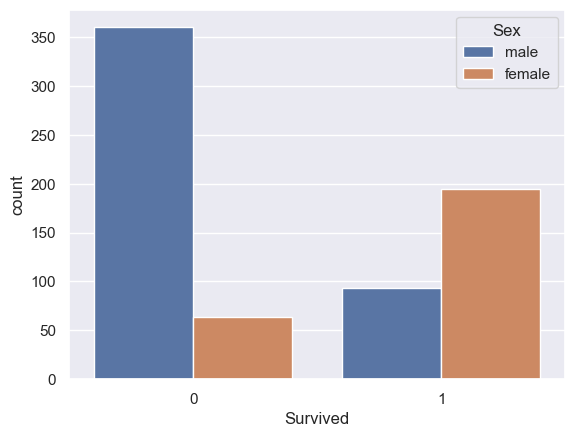

In [10]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

Even though there are more males than females, but the number of females survived is larger than that of males survived. Sex and Survived are correlated.

### 4.2.2 Chi-Squared Tests

In [11]:
from scipy.stats import chi2_contingency
contigency= pd.crosstab(df['Sex'], df['Survived'])
c, p, dof, expected = chi2_contingency(contigency)
p # p-value

4.939416685451492e-46

P-value < 0.05, so we reject the null hypothesis that the relationship between Sex and Survived is not statistically significant. We will include Sex in the feature set.

## 4.3 Age

### 4.3.1 Countplot

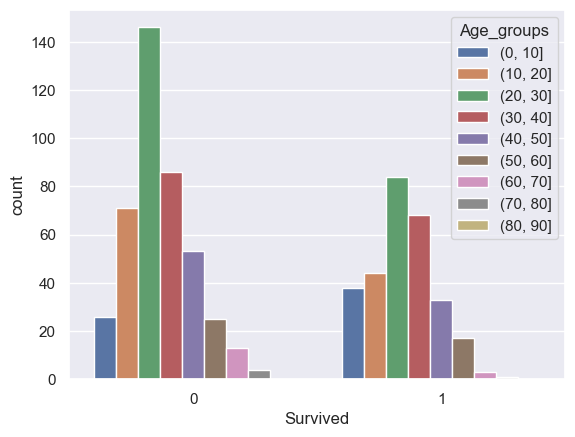

In [12]:
# change continous 'Age' to categorical 'Age_groups'
bins=np.arange(0,100,10)
df['Age_groups'] = pd.cut(df['Age'], bins=bins)
sns.countplot(x='Survived',hue='Age_groups',data=df)
plt.show()

Children are more likely to survive, while the old are less likely to survive. Age and Survived are correlated.

### 4.3.2 Chi-Squared Tests

In [13]:
from scipy.stats import chi2_contingency
contigency= pd.crosstab(df['Age_groups'], df['Survived'])
c, p, dof, expected = chi2_contingency(contigency) # chi-square test
print(p) # p-value
df = df.drop(['Age_groups'], axis = 1) # delete 'Age_groups'

0.02295926449953404


P-value < 0.05, so we reject the null hypothesis that the relationship between Age and Survived is not statistically significant. We will include Age in the feature set.

## 4.4 SibSp

### 4.4.1 Countplot

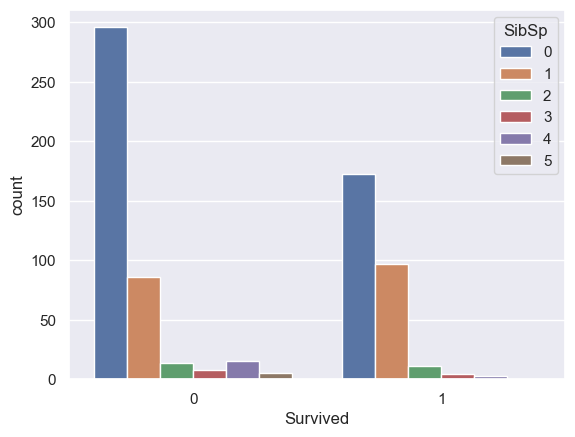

In [14]:
sns.countplot(x='Survived',hue='SibSp',data=df)
plt.show()

Passengers with one sibling / spouse aboard the Titanic are more likely to survive, while passengers with no or more siblings / spouses aboard the Titanic are less likely to survive. SibSp and Survived are correlated.

### 4.4.2 Chi-Squared Tests

In [15]:
from scipy.stats import chi2_contingency
contigency= pd.crosstab(df['SibSp'], df['Survived'])
c, p, dof, expected = chi2_contingency(contigency)
p # p-value

0.00042907488830226415

P-value < 0.05, so we reject the null hypothesis that the relationship between SibSp and Survived is not statistically significant. We will include SibSp in the feature set.

## 4.5 Parch

### 4.5.1 Countplot

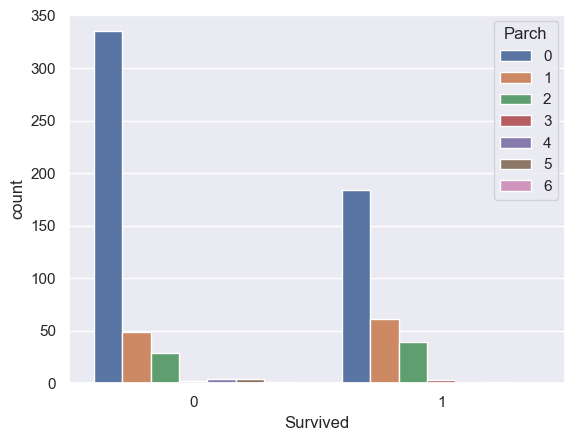

In [16]:
sns.countplot(x='Survived',hue='Parch',data=df)
plt.show()

Passengers with 1~3 parents / children aboard the Titanic are more likely to survive, while passengers with other numbers of parents / children aboard the Titanic are less likely to survive. Parch and Survived are correlated.

### 4.5.2 Chi-Squared Tests

In [17]:
from scipy.stats import chi2_contingency
contigency= pd.crosstab(df['Parch'], df['Survived'])
c, p, dof, expected = chi2_contingency(contigency)
p # p-value

6.681060065052954e-05

P-value < 0.05, so we reject the null hypothesis that the relationship between Parch and Survived is not statistically significant. We will include Parch in the feature set.

## 4.6 Fare

### 4.6.1 Countplot

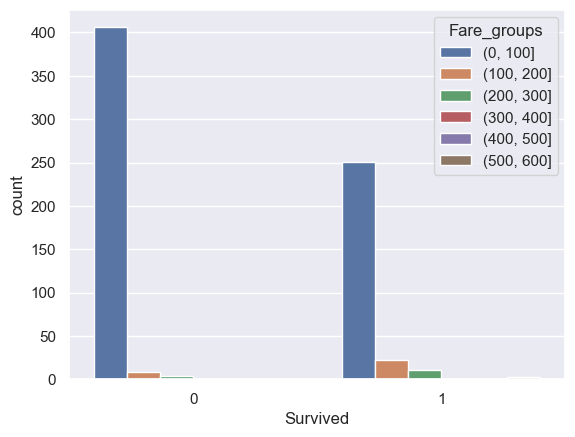

In [18]:
# change continous 'Fare' to categorical 'Fare_groups'
bins=np.arange(0,700,100)
df['Fare_groups'] = pd.cut(df['Fare'], bins=bins)
sns.countplot(x='Survived',hue='Fare_groups',data=df)
plt.show()

Passengers with fare less than 100 are less likely to survive, while passengers with fare more than 100 are more likely to survive. Fare and Survived are correlated.

### 4.6.2 Chi-Squared Tests

In [19]:
from scipy.stats import chi2_contingency
contigency= pd.crosstab(df['Fare_groups'], df['Survived'])
c, p, dof, expected = chi2_contingency(contigency) # chi-square test
print(p) # p-value
df = df.drop(['Fare_groups'], axis = 1) # delete Fare_groups

9.908258459046834e-06


P-value < 0.05, so we reject the null hypothesis that the relationship between Fare and Survived is not statistically significant. We will include Fare in the feature set.

## 4.7 Embarked

### 4.7.1 Countplot

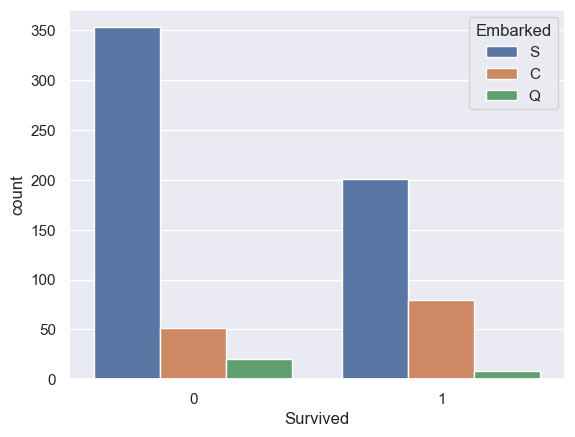

In [20]:
sns.countplot(x='Survived',hue='Embarked',data=df)
plt.show()

Passengers embarked from C are more likely to survive, while passengers embarked from S and Q are less likely to survive. Embarked and Survived are correlated.

### 4.7.2 Chi-Squared Tests

In [21]:
from scipy.stats import chi2_contingency
contigency= pd.crosstab(df['Embarked'], df['Survived'])
c, p, dof, expected = chi2_contingency(contigency)
p # p-value

8.660306799267924e-07

P-value < 0.05, so we reject the null hypothesis that the relationship between Embarked and Survived is not statistically significant. We will include Embarked in the feature set.

## 4.8 Correlation Matrix

In [22]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


According to correlation matrix, Fare and Pclass are the mostly correlated features with a Pearson’s correlation coefficient of -0.55, which is acceptable. Therefore, we don't need to drop any features due to high correlation.

## 4.9 Conclusion of Exploratory Data Analysis

After applying countplot and chi-squared test to each feature vs. Survived, we found all of them are correlated with Survived. By analyzing correlation matrix, the correlation between features are acceptable, thus we will not drop any features from the feature set.

# 5 Models

## 5.1 Collinearity

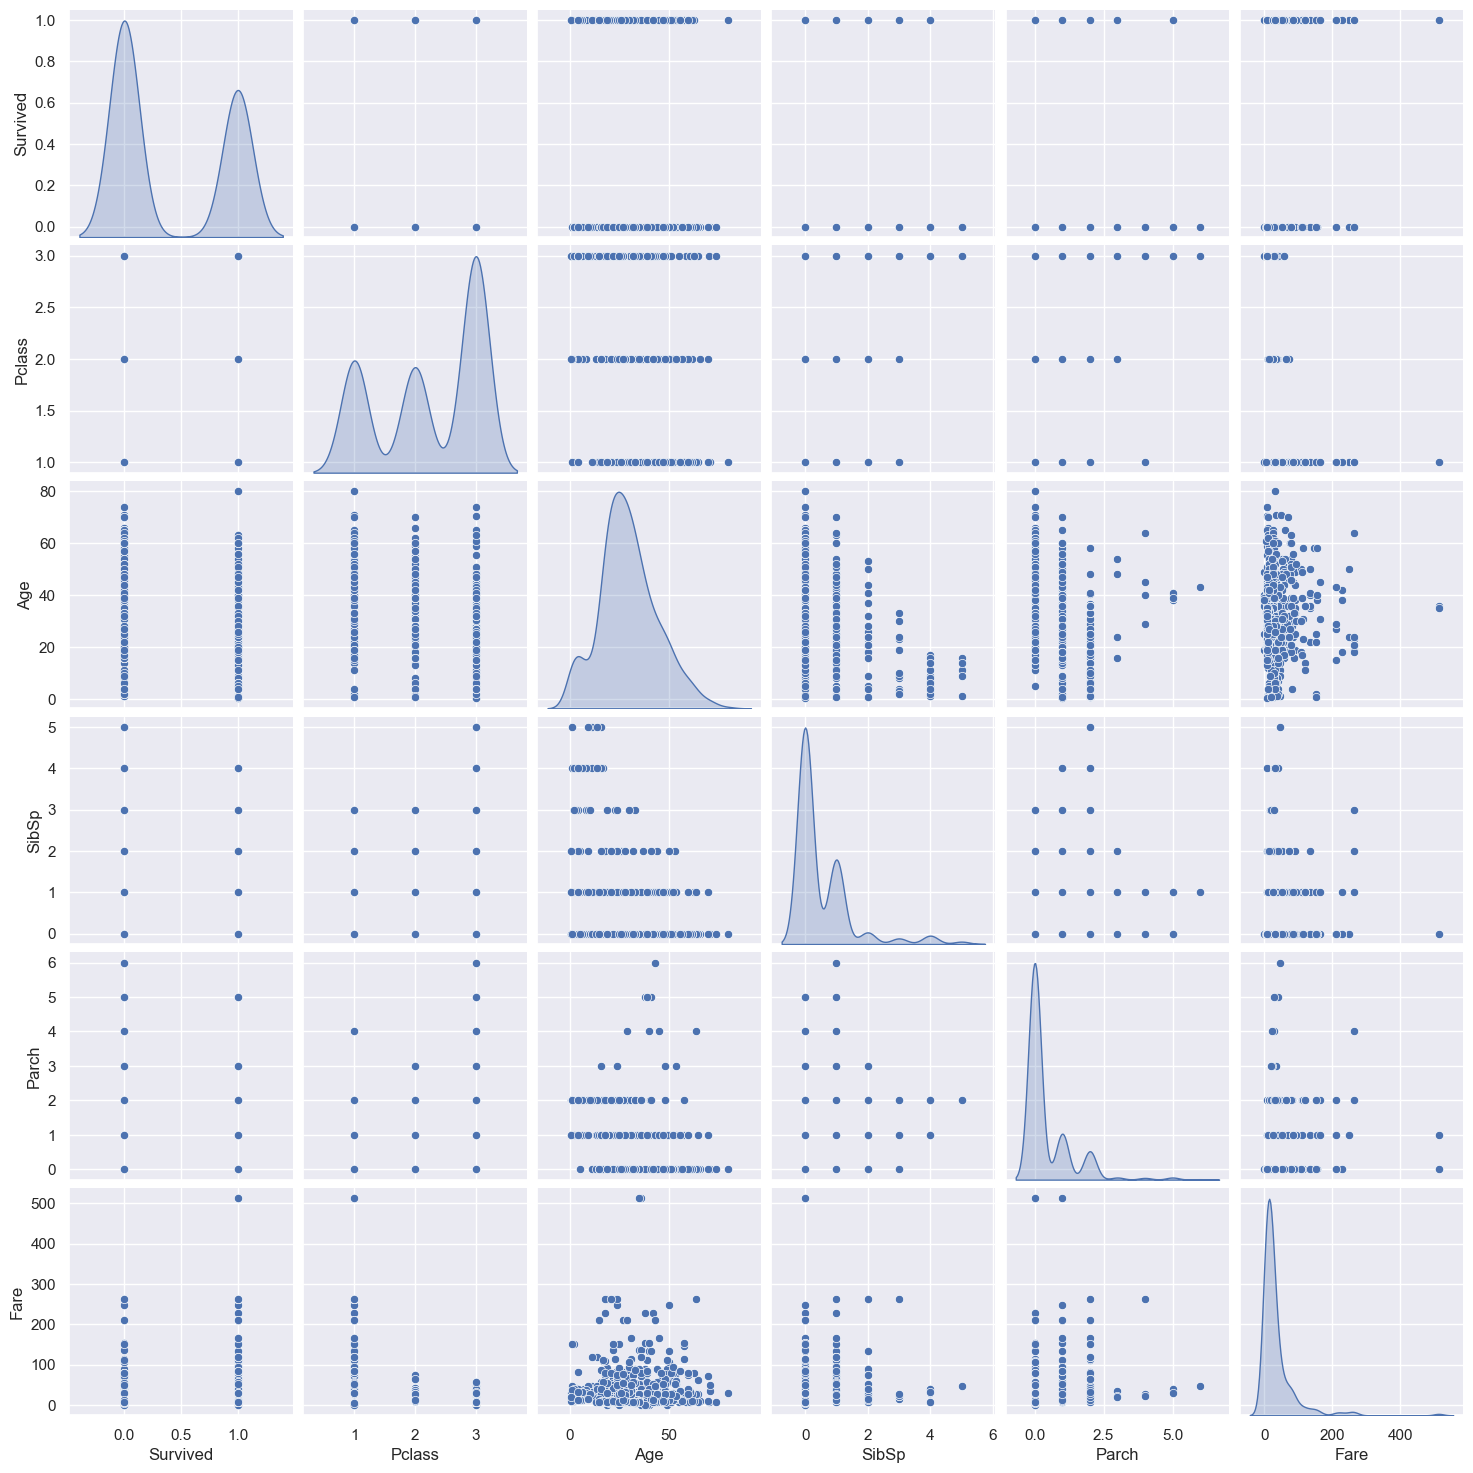

In [23]:
sns.pairplot(df, diag_kind="kde")
plt.show()

According to the pair plot, there is no collinearity among features.

## 5.2 Preparing for Machine Learning Models

### 5.2.1  Encoding Categorical Variables

Machines Learning algorithms do not accept categorical variables as input. In order to feed data in a machine learning model, we will encode categorical variables into numerical ones.

In [24]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=False)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


### 5.2.2 Train-Test Spliting

Split the data into training and testing sets with a ratio of 7:3.

In [25]:
y = df['Survived']
X = df[df.columns.drop('Survived')] # seperate features and Survived
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## 5.3 Machine Learning Models and Hyperparameter Tuning 

### 5.3.1 Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty = 'l2', C = 1)
logreg.fit(X_train,y_train)

LogisticRegression(C=1)

### 5.3.2 Hyperparameter Tuning for Logistic Regression

In [27]:
from sklearn.model_selection import GridSearchCV
logreg_g = LogisticRegression()
parameters = {'C': np.arange(11).tolist(), 'penalty': ['l1', 'l2']}
grid = GridSearchCV(logreg_g, parameters) # grid research
grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2']})

In [28]:
logreg_g = grid.best_estimator_ # best estimator
print(grid.best_score_)
print(grid.best_params_)

0.8051919191919191
{'C': 5, 'penalty': 'l2'}


### 5.3.3 Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

### 5.3.4 Hyperparameter Tuning for Decision Tree Classifier

In [30]:
clf_g = DecisionTreeClassifier()
parameters = {'max_depth': np.arange(11).tolist(), 'min_samples_leaf': np.arange(11).tolist()}
grid = GridSearchCV(clf_g, parameters) # grid research
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                              10]})

In [31]:
clf_g = grid.best_estimator_ # best estimator
print(grid.best_score_)
print(grid.best_params_)

0.8132121212121213
{'max_depth': 7, 'min_samples_leaf': 6}


### 5.3.5 Gaussian Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)

GaussianNB()

# 6 Results and Analysis

## 6.1 ROC Curves

ROC curve shows true positive rate and false positive rate of models. The more ROC curve is close to the top left corner, the better the model is. Area under the curve (AUC) is an important evaluation metric ranged from 0 to 1, the larger, the better.

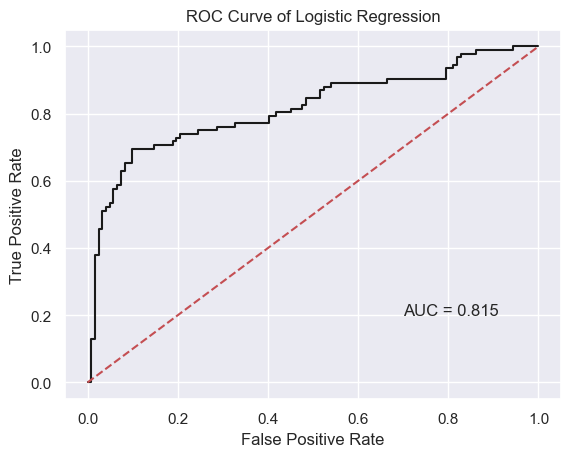

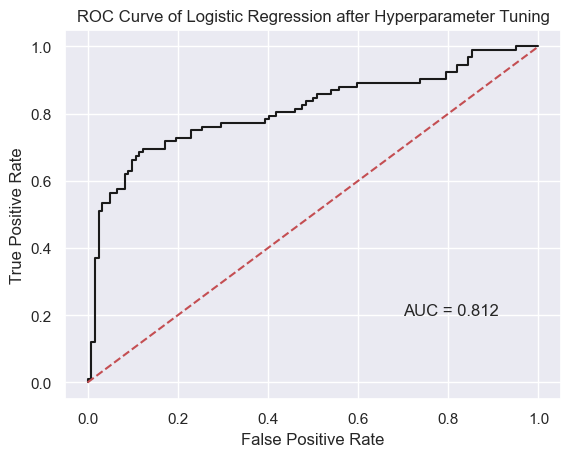

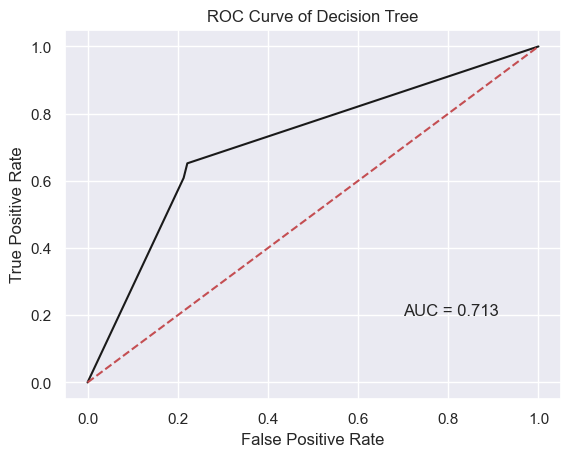

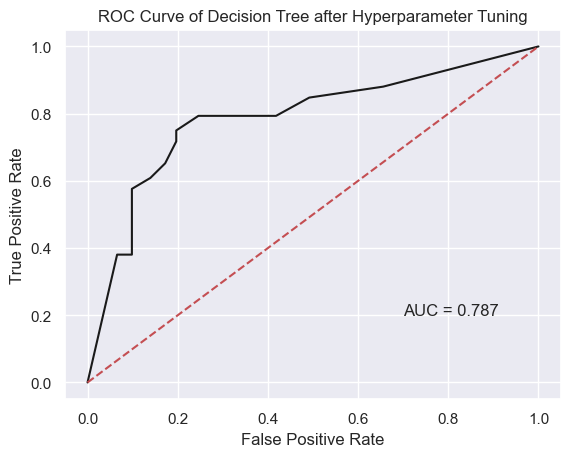

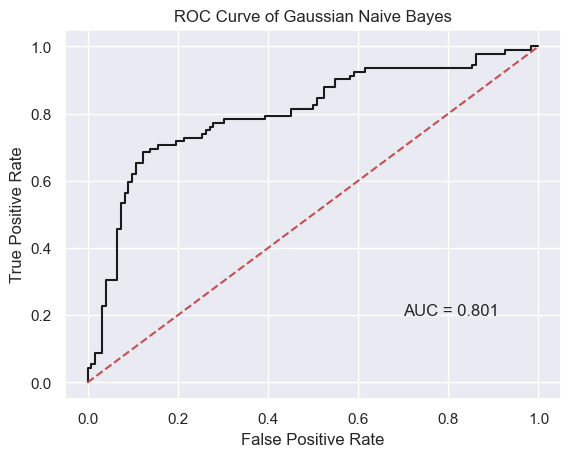

In [33]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
models = [logreg, logreg_g, clf, clf_g, gaussian] # list of classifiers
name = ['Logistic Regression', 'Logistic Regression after Hyperparameter Tuning',
        'Decision Tree', 'Decision Tree after Hyperparameter Tuning', 'Gaussian Naive Bayes'] # model names
for i in range(len(models)):
    ypp = models[i].predict_proba(X_test)
    fpr, tpr, th = roc_curve(y_test, ypp[:,1])
    auc = roc_auc_score(y_test, ypp[:,1]) # calculate AUC
    plt.plot(fpr, tpr, 'k-')
    plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), 'r--') # plot ROC
    plt.title('ROC Curve of ' + name[i])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(0.7, 0.2, 'AUC = ' + "{:.3f}".format(auc))
    plt.show()

According to ROC curves and AUC values, the rank of machine learning models is: Logistic Regression, Logistic Regression after Hyperparameter Tuning, Gaussian Naive Bayes, Decision Tree after Hyperparameter Tuning, and Decision Tree.

## 6.2 Evaluation Metrics

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

d = []
for i in range(len(models)):
    y_pred = models[i].predict(X_test)
    acc = round(accuracy_score(y_pred, y_test), 3) # accuracy
    rec = round(recall_score(y_pred, y_test), 3) # recall 
    pre = round(precision_score(y_pred, y_test), 3) # precision
    auc = round(roc_auc_score(y_test, models[i].predict_proba(X_test)[:,1]), 3) # AUC
    d.append([name[i], acc, rec, pre, auc])
from tabulate import tabulate
print(tabulate(d, headers=["Accuracy", "Recall", "Precision", "AUC"])) # print table

                                                   Accuracy    Recall    Precision    AUC
-----------------------------------------------  ----------  --------  -----------  -----
Logistic Regression                                   0.799     0.81         0.696  0.815
Logistic Regression after Hyperparameter Tuning       0.794     0.8          0.696  0.812
Decision Tree                                         0.71      0.683        0.609  0.713
Decision Tree after Hyperparameter Tuning             0.752     0.741        0.652  0.787
Gaussian Naive Bayes                                  0.762     0.725        0.717  0.801


Based on Accuracy, Recall, Precision and AUC, the rank of machine learning models is: Logistic Regression, Logistic Regression after Hyperparameter Tuning, Gaussian Naive Bayes, Decision Tree after Hyperparameter Tuning, and Decision Tree. Even though Precision of Gaussian Naive Bayes is larger than that of Logistic Regression and Recall of Decision Tree after Hyperparameter Tuning is larger than that of Gaussian Naive Bayes, other metrics also contribute to the ranking. This ranking is the same as the previous ranking involving ROC and AUC, so we will choose Logistic Regression as the model to predict Survived.

# 7 Discussion and Conclusion

## 7.1 Discussion

It is not surprising to see Logistic Regression after Hyperparameter Tuning fits better on training set than Logistic Regression, since the Hyperparameter Tuning iterated with many classifiers and chose the one with best score. But when fitting into testing set, the one without Hyperparameter Tuning has better scores. This is because Hyperparameter Tuning sometimes overfits to training set and picks up noises, thus not work well on testing set.

## 7.2 Learnings and Takeaways

1. Citation of dataset is needed to be provided
2. Check data types of features
3. Remove irrelavent features, drop or impute missing values, and check for imbalance when dealing with data cleaning
4. Consider correlations and colinearities between features
5. Encode categorical variables into numerical ones because Machines Learning algorithms do not accept categorical variables as input.
6. Be careful about overfitting

## 7.3 Future Work to Improve

The best accuracy now is 0.799, generated from Logistic Regression. It is not good enough to predict Survived, therefore, try more machine learning models to get improved. Meanwhile, use technologies to prevent overfitting, for instance, Cross Validation. It is a resampling method that uses different portions of the data to test and train a model on different iterations, thus reduce the chance of overfitting.